In [1]:
import pandas as pd
import geopandas as gpd
import xyzservices
import geojson
import numpy as np
!pip install mapclassify
import matplotlib.pyplot as plt


**Transforming csv in geojson**

In [2]:
df = pd.read_csv('escolas_2023_coordenadas.csv')

In [3]:
df = df.replace({np.nan: None})

In [4]:
features = []
for _, row in df.iterrows():
    point = geojson.Point((row['Longitude'], row['Latitude']))
    properties = row.drop(['Longitude', 'Latitude']).to_dict()
    feature = geojson.Feature(geometry=point, properties=properties)
    features.append(feature)

In [5]:
feature_collection = geojson.FeatureCollection(features)

In [6]:
with open('escolas_2023_coordenadas.geojson', 'w') as f:
    geojson.dump(feature_collection, f)

**Plotting nap with geojson**

In [7]:
# Reading geojson file
data = gpd.read_file('escolas_2023_coordenadas.geojson')

In [8]:
data.columns

Index(['SG_UF', 'NO_ENTIDADE', 'IN_AGUA_POTAVEL', 'IN_COMP_PORTATIL_ALUNO',
       'IN_INTERNET', 'TP_DEPENDENCIA', 'IN_EDUCACAO_INDIGENA', 'geometry'],
      dtype='object')

In [9]:
# Sorting column for red dots appearing on top
data = data.sort_values(by='IN_AGUA_POTAVEL', ascending=False)


In [10]:
# Importing colors for ploting
from matplotlib.colors import ListedColormap

colors = {
    1: '#0000FF',
    0: '#FF0000'
}

cmap = ListedColormap([t[1] for t in sorted(colors.items())])

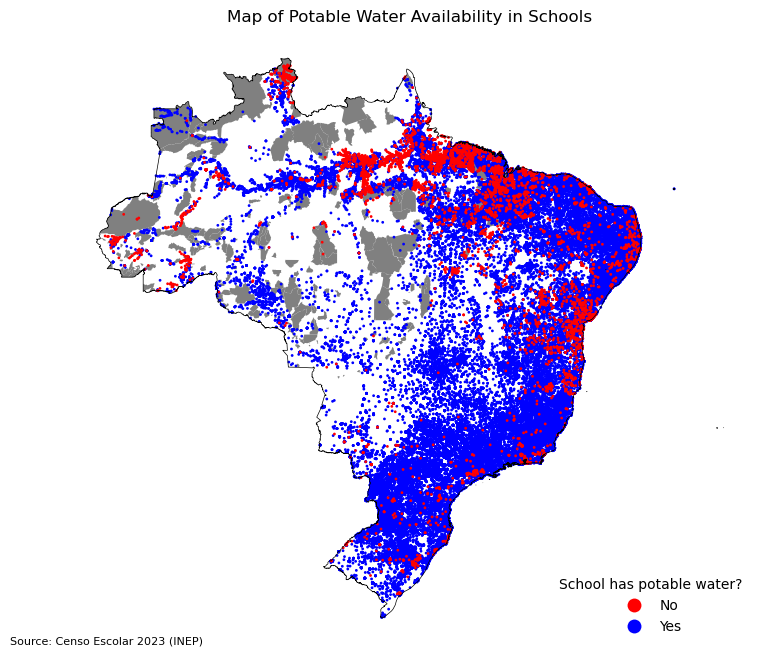

In [11]:
# Creating map
fig, ax = plt.subplots(figsize=(10, 8))  

# Plotting the contour of Brazil
br = gpd.read_file("BR_Pais_2022/BR_Pais_2022.shp")
br.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')

# Plotting indigenous lands
ti = gpd.read_file("https://raw.githubusercontent.com/bplmp/geopandas-ex-data/main/indigenous_area_legal_amazon.geojson")
ti.plot(ax=ax, color='grey')

# Plotting school data
data.plot(ax=ax, column='IN_AGUA_POTAVEL', cmap=cmap, legend=True, markersize=1, categorical=True)  # Adjusted marker size for better visibility

# Setting up legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0))
leg.set_loc('lower right')
leg.set_title('School has potable water?')
leg.get_texts()[0].set_text('No')
leg.get_texts()[1].set_text('Yes')
leg.set_frame_on(False)

# Removing axes
ax.set_axis_off()

# Adding title
ax.set_title('Map of Potable Water Availability in Schools')

# Adding source
ax.text(0.2, 0.0, 'Source: Censo Escolar 2023 (INEP)', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color='black')


plt.show()
